In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#filename1 = sys.argv[1]
filename1 = 'cases_train.csv'
filename2 = 'location.csv'
filename3 = 'cases_test.csv'


train_data = pd.read_csv(filename1)
location_data = pd.read_csv(filename2, delimiter=',')
test_data = pd.read_csv(filename3)

In [3]:
train_data

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized
3,15-34,female,Baden-Wurttemberg,Germany,48.120860,7.849500,15.03.2020,NaN,NaN,nonhospitalized
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized
...,...,...,...,...,...,...,...,...,...,...
367631,15.0,male,Santa Fe,Argentina,-32.967800,-60.659240,31.03.2020,NaN,NaN,nonhospitalized
367632,NaN,NaN,Delhi,India,28.614740,77.209100,16.04.2020,NaN,https://twitter.com/ANI/status/125082767765900...,hospitalized
367633,NaN,NaN,Maharashtra,India,19.200000,72.966670,30.05.2020,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,hospitalized
367634,28,female,NaN,Singapore,1.280224,103.834500,03.02.2020,Case 19; worked at health product shop with ma...,https://www.moh.gov.sg/news-highlights/details...,recovered


In [4]:
#hist,bins=np.histogram(train_data['latitude'])
#plt.bar(bins[:-1], hist, width=(bins[-1]-bins[-2]), align="edge")
#plt.show()


In [5]:
#data34 = train_data['country'].values
#plt.hist(data34, train_data['outcome'].values, 'b.', alpha=0.5)
#plt.show() 

In [6]:
train_data['outcome'].value_counts()


nonhospitalized    150000
hospitalized       125000
recovered           88137
deceased             4499
Name: outcome, dtype: int64

In [7]:
train_data['outcome'].values

array(['recovered', 'hospitalized', 'hospitalized', ..., 'hospitalized',
       'recovered', 'nonhospitalized'], dtype=object)

In [8]:
#train_data['outcome'].values

In [9]:
#plt.hist(train_data['outcome'].values, train_data['outcome'].value_counts(), 'b.', alpha=0.5)
#plt.show() 

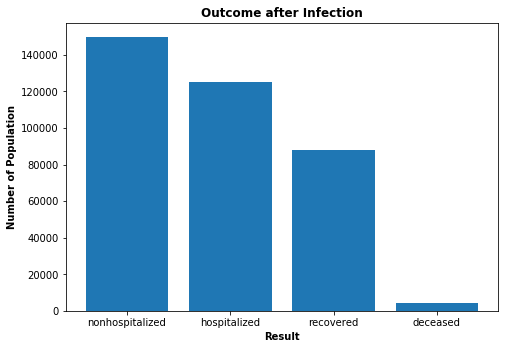

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(train_data['outcome'].value_counts().keys(), train_data['outcome'].value_counts())
plt.title('Outcome after Infection',fontweight='bold')
plt.xlabel('Result',fontweight='bold')
plt.ylabel('Number of Population',fontweight='bold')
plt.show() 

In [11]:
train_data['country'].value_counts()

India                       212411
Peru                         57305
Germany                      33009
Philippines                  11521
Colombia                     11464
                             ...  
Iceland                          1
Kosovo                           1
Luxembourg                       1
Central African Republic         1
Qatar                            1
Name: country, Length: 131, dtype: int64

In [12]:
train_data['country']

0             India
1             India
2             India
3           Germany
4             India
            ...    
367631    Argentina
367632        India
367633        India
367634    Singapore
367635         Peru
Name: country, Length: 367636, dtype: object

In [13]:
train_data2 = train_data

In [14]:
#train_data2

In [15]:
plt_values = train_data2['country'].value_counts()
to_remove = plt_values[plt_values <= 10000].index
train_data2 = train_data2[~train_data2.country.isin(to_remove)]

In [16]:
train_data2['country'].value_counts()

India          212411
Peru            57305
Germany         33009
Philippines     11521
Colombia        11464
Name: country, dtype: int64

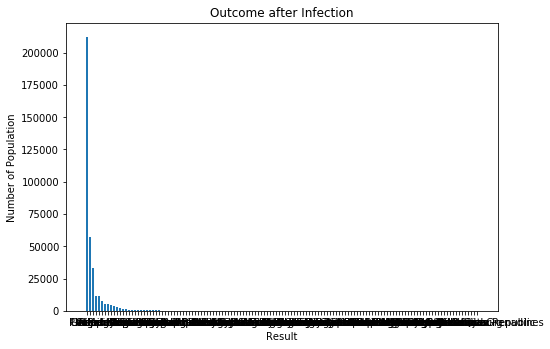

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(train_data['country'].value_counts().keys(), train_data['country'].value_counts())
plt.title('Outcome after Infection')
plt.xlabel('Result')
plt.ylabel('Number of Population')
plt.show() 

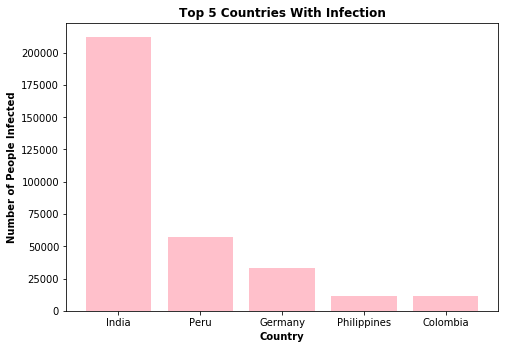

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(train_data2['country'].value_counts().keys(), train_data2['country'].value_counts(),color='pink')
plt.title('Top 5 Countries With Infection',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Number of People Infected',fontweight='bold')
plt.show() 

In [19]:
train_data3 = train_data[train_data['country'] == 'India']

In [20]:
train_data3

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized
5,NaN,NaN,Maharashtra,India,19.200000,72.966670,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,recovered
...,...,...,...,...,...,...,...,...,...,...
367628,NaN,NaN,Gujarat,India,23.027760,72.600270,25.04.2020,NaN,https://twitter.com/PIBAhmedabad/status/125405...,hospitalized
367629,NaN,NaN,West Bengal,India,25.010940,88.140530,24.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,hospitalized
367630,NaN,NaN,Tamil Nadu,India,13.083620,80.282520,29.05.2020,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,recovered
367632,NaN,NaN,Delhi,India,28.614740,77.209100,16.04.2020,NaN,https://twitter.com/ANI/status/125082767765900...,hospitalized


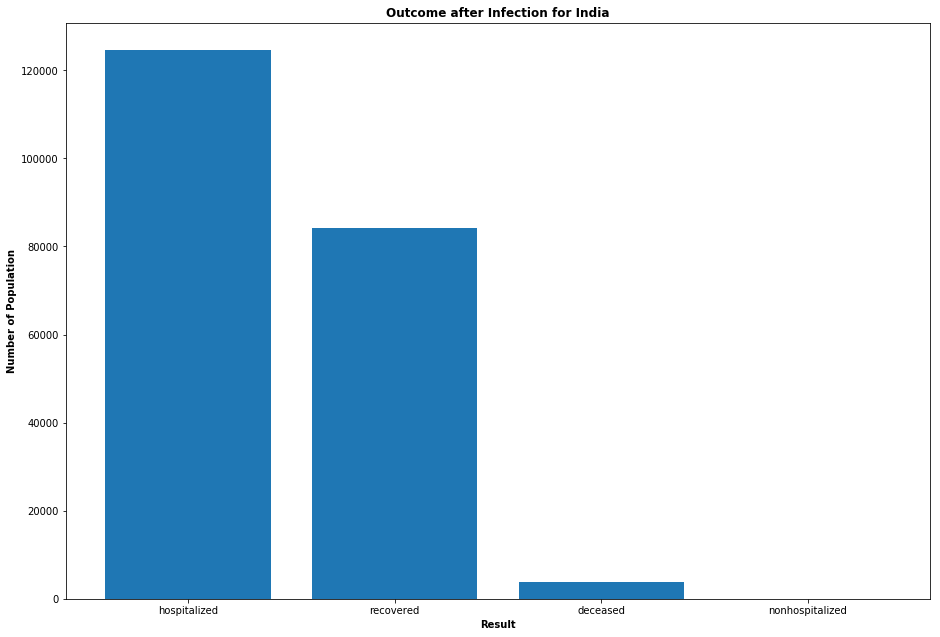

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(train_data3['outcome'].value_counts().keys(), train_data3['outcome'].value_counts())
plt.title('Outcome after Infection for India',fontweight='bold')
plt.xlabel('Result',fontweight='bold')
plt.ylabel('Number of Population',fontweight='bold')
plt.show() 

In [22]:
train_data3['outcome'].value_counts()

hospitalized       124550
recovered           84091
deceased             3764
nonhospitalized         6
Name: outcome, dtype: int64

In [23]:
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


In [24]:
location_data['Case-Fatality_Ratio'].value_counts()

0.000000    678
2.941176     10
1.515152     10
2.083333      8
1.265823      8
           ... 
0.931677      1
0.860295      1
6.115990      1
9.336100      1
0.313972      1
Name: Case-Fatality_Ratio, Length: 2624, dtype: int64

In [25]:
location_data['Combined_Key'].value_counts()

Lake, Oregon, US                  1
Rockingham, North Carolina, US    1
Clarion, Pennsylvania, US         1
Merced, California, US            1
Calhoun, Arkansas, US             1
                                 ..
Webster, Nebraska, US             1
Burke, North Carolina, US         1
Hart, Georgia, US                 1
Starke, Indiana, US               1
Van Wert, Ohio, US                1
Name: Combined_Key, Length: 3954, dtype: int64

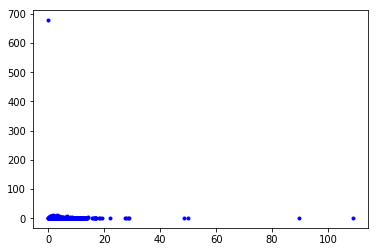

In [26]:
plt.plot(location_data['Case-Fatality_Ratio'].value_counts(),'b.')
plt.show()

In [27]:
#location_data.plot.scatter(location_data['Case-Fatality_Ratio'].values, location_data['Case-Fatality_Ratio'].value_counts(),'b.')
#plt.show()

In [28]:
location_data['Case-Fatality_Ratio'].values


array([ 3.69228397,  2.92818583,  3.35529895, ..., 28.87462981,
        2.34541578,  2.93274244])

In [29]:
location_data['Case-Fatality_Ratio'].value_counts().keys()

Float64Index([               0.0, 2.9411764705882355, 1.5151515151515151,
               2.083333333333333, 1.2658227848101269, 1.7241379310344829,
              1.2345679012345678, 1.9230769230769231, 1.6666666666666667,
               3.571428571428572,
              ...
               2.056298662407666, 2.3523523523523524,  3.046594982078853,
              2.5682182985553768, 0.6206040546131568, 0.9316770186335404,
              0.8602954927997007, 6.1159901890972375,  9.336099585062241,
              0.3139717425431711],
             dtype='float64', length=2624)

In [30]:
location_data['Combined_Key'].value_counts().keys()

Index(['Lake, Oregon, US', 'Rockingham, North Carolina, US',
       'Clarion, Pennsylvania, US', 'Merced, California, US',
       'Calhoun, Arkansas, US', 'Kent, Delaware, US', 'Guinea',
       'Fillmore, Minnesota, US', 'Treasure, Montana, US',
       'Big Horn, Montana, US',
       ...
       'Chelan, Washington, US', 'Washington, Georgia, US',
       'Fredericksburg, Virginia, US', 'Martinsville, Virginia, US',
       'Montgomery, Tennessee, US', 'Webster, Nebraska, US',
       'Burke, North Carolina, US', 'Hart, Georgia, US', 'Starke, Indiana, US',
       'Van Wert, Ohio, US'],
      dtype='object', length=3954)

In [31]:
location_data['Incidence_Rate'].value_counts()

0.000000       11
1165.770980     2
671.785029      2
0.298507        1
1385.144575     1
               ..
1119.166608     1
2327.272727     1
1422.015207     1
2987.704897     1
1.032609        1
Name: Incidence_Rate, Length: 3862, dtype: int64

In [32]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#plt.plot(location_data['Combined_Key'].value_counts(), location_data['Incidence_Rate'].value_counts())
#plt.title('Outcome after Infection for India')
#plt.xlabel('Result')
#plt.ylabel('Number of Population')
#plt.show() 

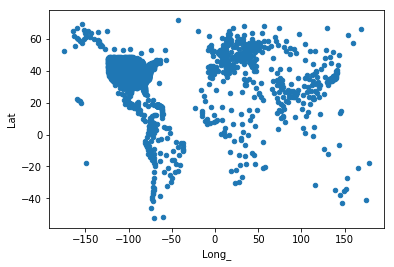

In [33]:
location_data.plot.scatter(x='Long_', y='Lat')
plt.show()

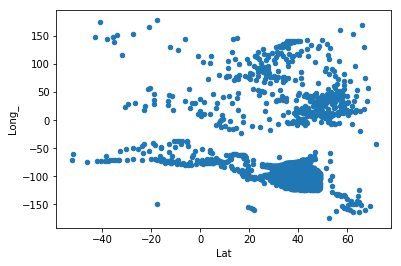

In [34]:
location_data.plot.scatter(x='Lat', y='Long_')
plt.show()

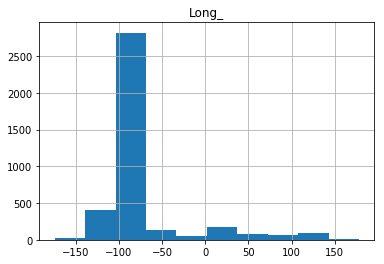

In [35]:
location_data.hist(column='Long_')
plt.show()

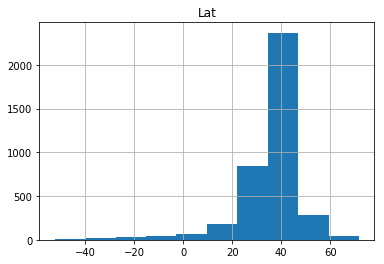

In [36]:
location_data.hist(column='Lat')
plt.show()

In [37]:
location_data['Case-Fatality_Ratio'].mean()

2.355817632664575

In [38]:
location_data['Case-Fatality_Ratio'].std()

3.5385034408405285

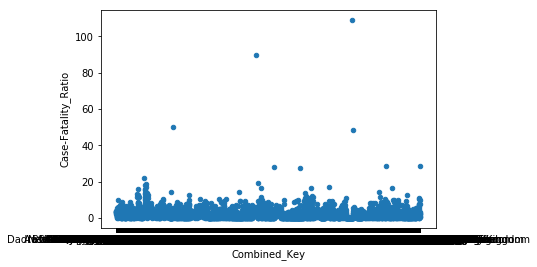

In [39]:
location_data.plot.scatter(x='Combined_Key', y='Case-Fatality_Ratio')
plt.show()

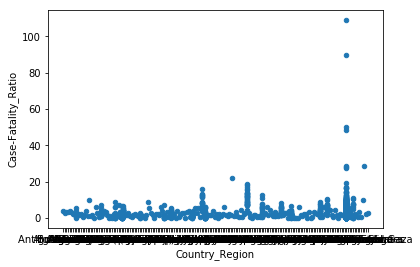

In [40]:
location_data.plot.scatter(x='Country_Region', y='Case-Fatality_Ratio')
plt.show()

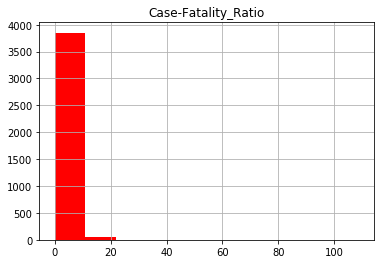

In [41]:
location_data.hist(column='Case-Fatality_Ratio', color='red')
plt.show()

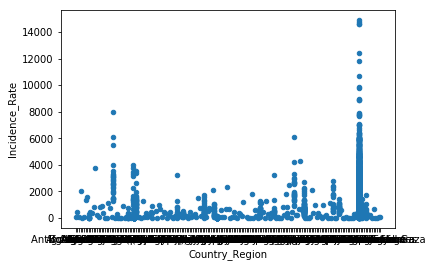

In [42]:
location_data.plot.scatter(x='Country_Region', y='Incidence_Rate')
plt.show()

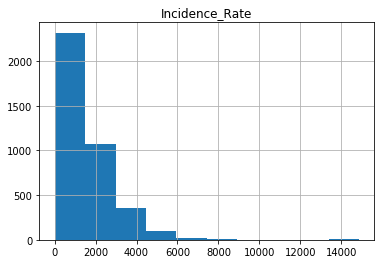

In [43]:
location_data.hist(column='Incidence_Rate')
plt.show()

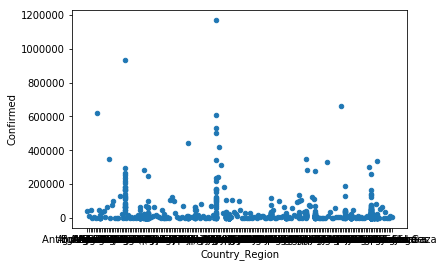

In [44]:
location_data.plot.scatter(x='Country_Region', y='Confirmed')
plt.show()

In [45]:
test_data

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Rajasthan,India,24.587000,73.69848,11.05.2020,NaN,https://t.me/indiacovid/4565,NaN
1,15-34,male,Bayern,Germany,49.993767,9.66288,09.04.2020,NaN,NaN,NaN
2,NaN,NaN,Maharashtra,India,19.200000,72.96667,23.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN
3,NaN,NaN,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,NaN,https://twitter.com/JansamparkMP/status/126384...,NaN
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
46495,22,female,Caaguazu,Paraguay,-25.468250,-56.01425,22.05.2020,NaN,NaN,NaN
46496,21,male,Lima,Peru,-12.043180,-77.02824,04.05.2020,NaN,NaN,NaN
46497,73,male,Karnataka,India,14.029390,74.97440,02.04.2020,"Travelled to Delhi,",https://twitter.com/ANI/status/124564120884981...,NaN
46498,33,female,Lima,Peru,-11.932980,-77.04085,22.04.2020,NaN,NaN,NaN


In [46]:
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


In [47]:
lat_long_df = pd.DataFrame(location_data, columns=['Lat', 'Long_', 'Confirmed','Combined_Key','Active','Recovered','Deaths'])
lat_long_df.groupby('Lat').Long_.apply(pd.Series.tolist)

Lat
-52.368000        [-70.9863]
-51.796300        [-59.5236]
-45.986400        [-73.7669]
-42.882100        [147.3272]
-41.919800        [-72.1416]
                   ...      
 67.147163      [74.3415488]
 68.000042      [33.9999151]
 68.275572      [57.1686375]
 69.314792    [-153.4836093]
 71.706900        [-42.6043]
Name: Long_, Length: 3873, dtype: object

In [48]:
lat_long_df

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths
0,33.939110,67.709953,38919,Afghanistan,4906.0,32576,1437
1,41.153300,20.168300,12226,Albania,4980.0,6888,358
2,28.033900,1.659600,49623,Algeria,13035.0,34923,1665
3,42.506300,1.521800,1564,Andorra,347.0,1164,53
4,-11.202700,17.873900,3901,Angola,2309.0,1445,147
...,...,...,...,...,...,...,...
3949,31.952200,35.233200,35003,West Bank and Gaza,11304.0,23446,253
3950,24.215500,-12.885800,10,Western Sahara,1.0,8,1
3951,15.552727,48.516388,2026,Yemen,220.0,1221,585
3952,-13.133897,27.849332,14070,Zambia,375.0,13365,330


In [49]:
lat_long_df['Coordinate'] = lat_long_df[['Lat','Long_']].astype(str).apply(lambda x: ' '.join(x), axis=1)

In [50]:
lat_long_df

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
0,33.939110,67.709953,38919,Afghanistan,4906.0,32576,1437,33.93911 67.709953
1,41.153300,20.168300,12226,Albania,4980.0,6888,358,41.1533 20.1683
2,28.033900,1.659600,49623,Algeria,13035.0,34923,1665,28.0339 1.6596
3,42.506300,1.521800,1564,Andorra,347.0,1164,53,42.5063 1.5218
4,-11.202700,17.873900,3901,Angola,2309.0,1445,147,-11.2027 17.8739
...,...,...,...,...,...,...,...,...
3949,31.952200,35.233200,35003,West Bank and Gaza,11304.0,23446,253,31.9522 35.2332
3950,24.215500,-12.885800,10,Western Sahara,1.0,8,1,24.2155 -12.8858
3951,15.552727,48.516388,2026,Yemen,220.0,1221,585,15.552727 48.516388
3952,-13.133897,27.849332,14070,Zambia,375.0,13365,330,-13.133897 27.849332


In [51]:
lat_long_df['Coordinate'].value_counts()

nan nan                     80
55.76261984 -133.0511621     1
40.36680311 -76.45651841     1
37.48133648 -80.21072274     1
18.439692 -66.926113         1
                            ..
34.48254879 -94.22728802     1
43.10904162 -73.86653895     1
45.90018933 -112.6620092     1
41.56730777 -98.98197724     1
47.77372465 -96.40134647     1
Name: Coordinate, Length: 3875, dtype: int64

In [52]:
lat_long_df['Coordinate'].dropna(axis=0)

0         33.93911 67.709953
1            41.1533 20.1683
2             28.0339 1.6596
3             42.5063 1.5218
4           -11.2027 17.8739
                ...         
3949         31.9522 35.2332
3950        24.2155 -12.8858
3951     15.552727 48.516388
3952    -13.133897 27.849332
3953    -19.015438 29.154857
Name: Coordinate, Length: 3954, dtype: object

In [53]:
lat_long_df['Coordinate']

0         33.93911 67.709953
1            41.1533 20.1683
2             28.0339 1.6596
3             42.5063 1.5218
4           -11.2027 17.8739
                ...         
3949         31.9522 35.2332
3950        24.2155 -12.8858
3951     15.552727 48.516388
3952    -13.133897 27.849332
3953    -19.015438 29.154857
Name: Coordinate, Length: 3954, dtype: object

In [54]:
lat_long_df['Confirmed'].sort_values()

2982          0
2712          0
1756          0
2135          0
3071          0
         ...   
234      609558
6        622934
574      659656
54       931673
253     1167496
Name: Confirmed, Length: 3954, dtype: int64

In [55]:
lat_long_df['Confirmed'].value_counts()

0        48
7        18
12       13
3        13
9        13
         ..
14138     1
1354      1
3901      1
14154     1
2777      1
Name: Confirmed, Length: 2116, dtype: int64

In [56]:
lat_long_df

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
0,33.939110,67.709953,38919,Afghanistan,4906.0,32576,1437,33.93911 67.709953
1,41.153300,20.168300,12226,Albania,4980.0,6888,358,41.1533 20.1683
2,28.033900,1.659600,49623,Algeria,13035.0,34923,1665,28.0339 1.6596
3,42.506300,1.521800,1564,Andorra,347.0,1164,53,42.5063 1.5218
4,-11.202700,17.873900,3901,Angola,2309.0,1445,147,-11.2027 17.8739
...,...,...,...,...,...,...,...,...
3949,31.952200,35.233200,35003,West Bank and Gaza,11304.0,23446,253,31.9522 35.2332
3950,24.215500,-12.885800,10,Western Sahara,1.0,8,1,24.2155 -12.8858
3951,15.552727,48.516388,2026,Yemen,220.0,1221,585,15.552727 48.516388
3952,-13.133897,27.849332,14070,Zambia,375.0,13365,330,-13.133897 27.849332


In [57]:
lat_long_df2 = lat_long_df

In [58]:
plt_values4 = lat_long_df2['Confirmed']
to_remove4 = plt_values4[plt_values4 <= 609557]
lat_long_df2 = lat_long_df2[~lat_long_df2.Confirmed.isin(to_remove4)]


In [59]:
lat_long_df2

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
6,-38.416100,-63.616700,622934,Argentina,132058.0,478077,12799,-38.4161 -63.6167
54,-23.550500,-46.633300,931673,"Sao Paulo, Brazil",117298.0,780448,33927,-23.5505 -46.6333
234,15.912900,79.740000,609558,"Andhra Pradesh, India",84423.0,519891,5244,15.9129 79.74
253,19.449759,76.108221,1167496,"Maharashtra, India",301273.0,834432,31791,19.449759 76.108221
574,-30.559500,22.937500,659656,South Africa,54282.0,589434,15940,-30.5595 22.9375


In [60]:
lat_long_df2 = lat_long_df2.sort_values(by=['Confirmed'],ascending=False)

In [61]:
lat_long_df2

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
253,19.449759,76.108221,1167496,"Maharashtra, India",301273.0,834432,31791,19.449759 76.108221
54,-23.550500,-46.633300,931673,"Sao Paulo, Brazil",117298.0,780448,33927,-23.5505 -46.6333
574,-30.559500,22.937500,659656,South Africa,54282.0,589434,15940,-30.5595 22.9375
6,-38.416100,-63.616700,622934,Argentina,132058.0,478077,12799,-38.4161 -63.6167
234,15.912900,79.740000,609558,"Andhra Pradesh, India",84423.0,519891,5244,15.9129 79.74


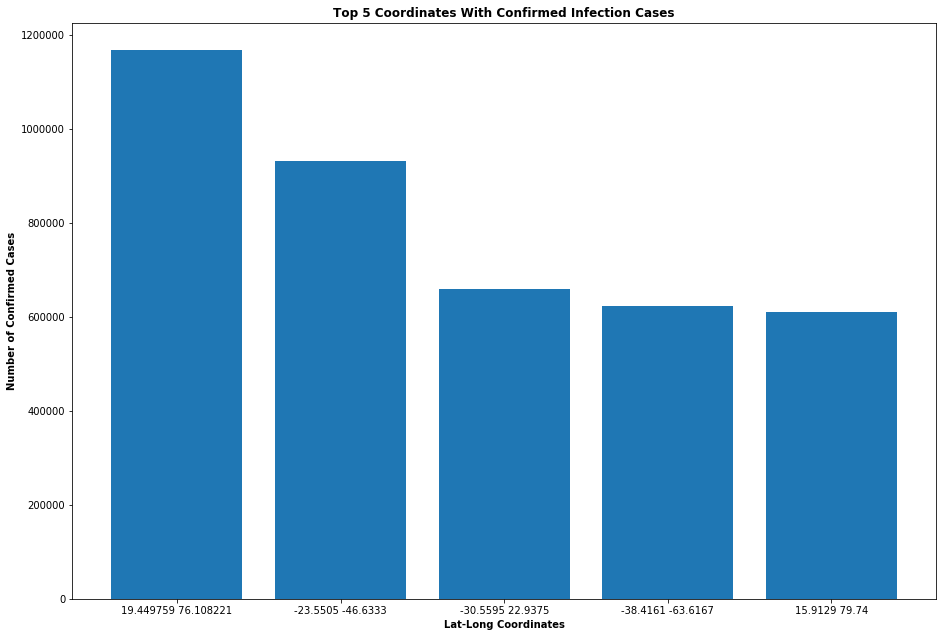

In [62]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Coordinate'], lat_long_df2['Confirmed'].sort_values(ascending=False))
plt.title('Top 5 Coordinates With Confirmed Infection Cases',fontweight='bold')
plt.xlabel('Lat-Long Coordinates',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')
plt.show() 

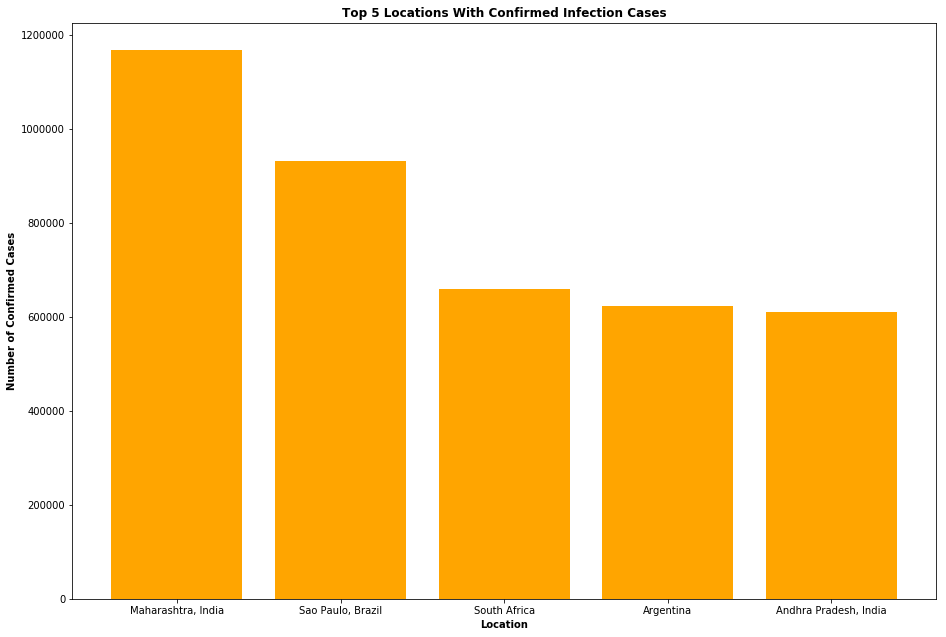

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Confirmed'].sort_values(ascending=False),color='orange')
plt.title('Top 5 Locations With Confirmed Infection Cases',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')
plt.show() 

([<matplotlib.patches.Wedge at 0x7f12e2519828>,
 [Text(0.66732597218006, 0.8744575729296065, ''),
  Text(-0.9258663240574546, 0.5939457466607, ''),
  Text(-0.8538288793517218, -0.6935245091451224, ''),
  Text(0.13267315323938575, -1.0919697039797023, ''),
  Text(0.9758024725564025, -0.5077494801108233, '')])

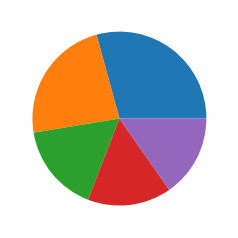

In [64]:
plt.pie(lat_long_df2['Confirmed'])

In [65]:
#lat_long_df2['Coordinate_Conf'] = lat_long_df2[['Coordinate','Confirmed']].astype(str).apply(lambda x: ' , '.join(x), axis=1)

#lat_long_df2['Combined_Conf'] = lat_long_df2[['Combined_Key','Confirmed']].astype(str).apply(lambda x: ' , '.join(x), axis=1)

In [66]:
lat_long_df2

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
253,19.449759,76.108221,1167496,"Maharashtra, India",301273.0,834432,31791,19.449759 76.108221
54,-23.550500,-46.633300,931673,"Sao Paulo, Brazil",117298.0,780448,33927,-23.5505 -46.6333
574,-30.559500,22.937500,659656,South Africa,54282.0,589434,15940,-30.5595 22.9375
6,-38.416100,-63.616700,622934,Argentina,132058.0,478077,12799,-38.4161 -63.6167
234,15.912900,79.740000,609558,"Andhra Pradesh, India",84423.0,519891,5244,15.9129 79.74


([<matplotlib.patches.Wedge at 0x7f12da78ad68>,
 [Text(0.66732597218006, 0.8744575729296065, 'Argentina'),
  Text(-0.9258663240574546, 0.5939457466607, 'Sao Paulo, Brazil'),
  Text(-0.8538288793517218, -0.6935245091451224, 'Andhra Pradesh, India'),
  Text(0.13267315323938575, -1.0919697039797023, 'Maharashtra, India'),
  Text(0.9758024725564025, -0.5077494801108233, 'South Africa')])

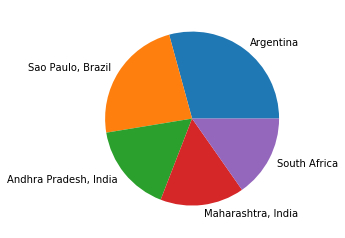

In [67]:
plt.pie(x=lat_long_df2['Confirmed'],labels=['Argentina','Sao Paulo, Brazil','Andhra Pradesh, India','Maharashtra, India','South Africa'])

In [68]:
test_data

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Rajasthan,India,24.587000,73.69848,11.05.2020,NaN,https://t.me/indiacovid/4565,NaN
1,15-34,male,Bayern,Germany,49.993767,9.66288,09.04.2020,NaN,NaN,NaN
2,NaN,NaN,Maharashtra,India,19.200000,72.96667,23.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN
3,NaN,NaN,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,NaN,https://twitter.com/JansamparkMP/status/126384...,NaN
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
46495,22,female,Caaguazu,Paraguay,-25.468250,-56.01425,22.05.2020,NaN,NaN,NaN
46496,21,male,Lima,Peru,-12.043180,-77.02824,04.05.2020,NaN,NaN,NaN
46497,73,male,Karnataka,India,14.029390,74.97440,02.04.2020,"Travelled to Delhi,",https://twitter.com/ANI/status/124564120884981...,NaN
46498,33,female,Lima,Peru,-11.932980,-77.04085,22.04.2020,NaN,NaN,NaN


In [69]:
lat_long_df2

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
253,19.449759,76.108221,1167496,"Maharashtra, India",301273.0,834432,31791,19.449759 76.108221
54,-23.550500,-46.633300,931673,"Sao Paulo, Brazil",117298.0,780448,33927,-23.5505 -46.6333
574,-30.559500,22.937500,659656,South Africa,54282.0,589434,15940,-30.5595 22.9375
6,-38.416100,-63.616700,622934,Argentina,132058.0,478077,12799,-38.4161 -63.6167
234,15.912900,79.740000,609558,"Andhra Pradesh, India",84423.0,519891,5244,15.9129 79.74


In [70]:
#lat_long_df2 = lat_long_df2.sort_values(by=['Confirmed'],ascending=False)

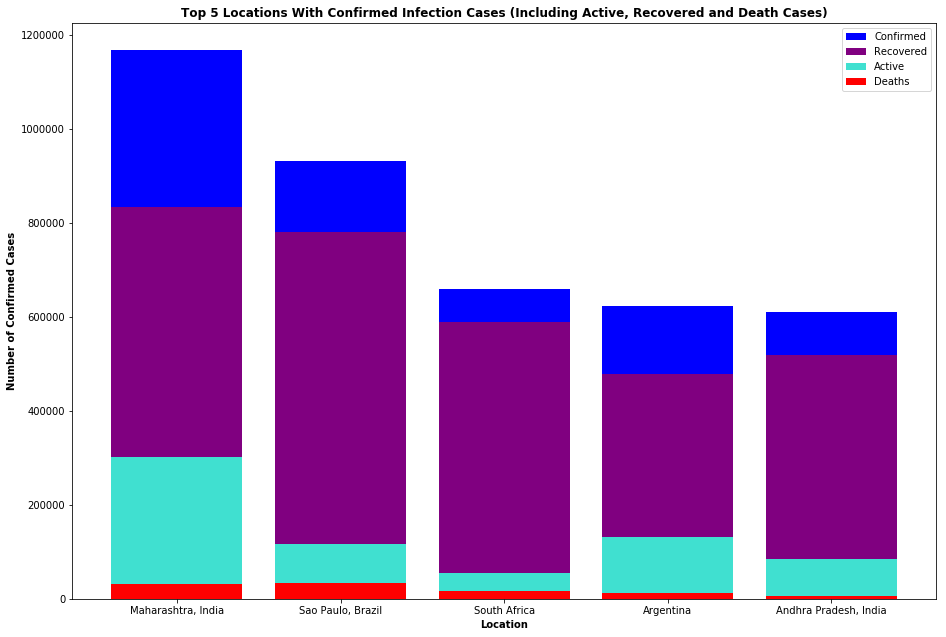

In [71]:
N=5
ind = np.arange(N)
width=0

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Confirmed'],color='b',label='Confirmed',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Recovered'],color='purple',label='Recovered',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Active'],color='turquoise',label='Active',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Deaths'],color='r',label='Deaths',align='center')
plt.title('Top 5 Locations With Confirmed Infection Cases (Including Active, Recovered and Death Cases)',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')

plt.xticks(ind+width/2)
plt.legend(loc='best')
plt.show() 

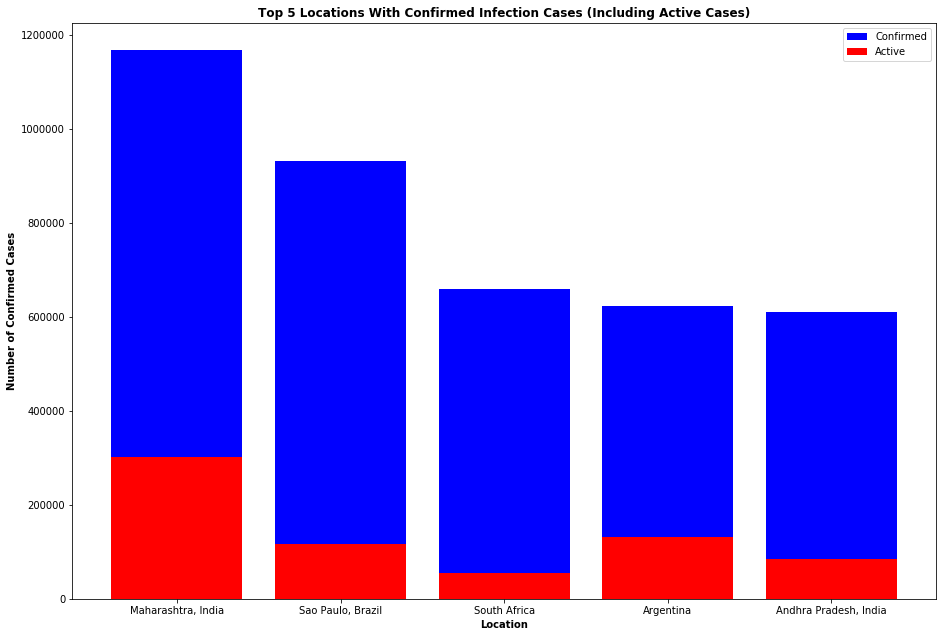

In [72]:
N=5
ind = np.arange(N)
width=0

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Confirmed'],color='b',label='Confirmed',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Active'],color='r',label='Active',align='center')
plt.title('Top 5 Locations With Confirmed Infection Cases (Including Active Cases)',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')

plt.xticks(ind+width/2)
plt.legend(loc='best')
plt.show() 

In [73]:
train_data4 = pd.DataFrame(train_data, columns=['sex', 'outcome'])

train_data5 = pd.DataFrame(train_data, columns=['sex', 'outcome'])

In [74]:
train_data['sex'].value_counts()

male      88635
female    71917
Name: sex, dtype: int64

In [75]:
train_data4

,sex,outcome
0,NaN,recovered
1,NaN,hospitalized
2,NaN,hospitalized
3,female,nonhospitalized
4,NaN,hospitalized
...,...,...
367631,male,nonhospitalized
367632,NaN,hospitalized
367633,NaN,hospitalized
367634,female,recovered


In [76]:
plt_values5 = train_data4['sex']
to_remove5 = plt_values5[plt_values5 == 'female']
train_data4 = train_data4[~train_data4.sex.isin(to_remove5)]

In [77]:
plt_values6 = train_data5['sex']
to_remove6 = plt_values6[plt_values6 == 'male']
train_data5 = train_data5[~train_data5.sex.isin(to_remove6)]

In [78]:
train_data4.dropna()

,sex,outcome
7,male,nonhospitalized
16,male,hospitalized
18,male,nonhospitalized
20,male,nonhospitalized
29,male,nonhospitalized
...,...,...
367603,male,nonhospitalized
367604,male,nonhospitalized
367618,male,hospitalized
367623,male,hospitalized


In [79]:
train_data5

,sex,outcome
0,NaN,recovered
1,NaN,hospitalized
2,NaN,hospitalized
3,female,nonhospitalized
4,NaN,hospitalized
...,...,...
367630,NaN,recovered
367632,NaN,hospitalized
367633,NaN,hospitalized
367634,female,recovered


In [80]:
train_data5.dropna()

,sex,outcome
3,female,nonhospitalized
10,female,nonhospitalized
25,female,nonhospitalized
30,female,nonhospitalized
31,female,nonhospitalized
...,...,...
367619,female,nonhospitalized
367626,female,nonhospitalized
367627,female,nonhospitalized
367634,female,recovered


In [81]:
train_data4['sex'].value_counts()

male    88635
Name: sex, dtype: int64

In [82]:
train_data5['sex'].dropna().value_counts()

female    71917
Name: sex, dtype: int64

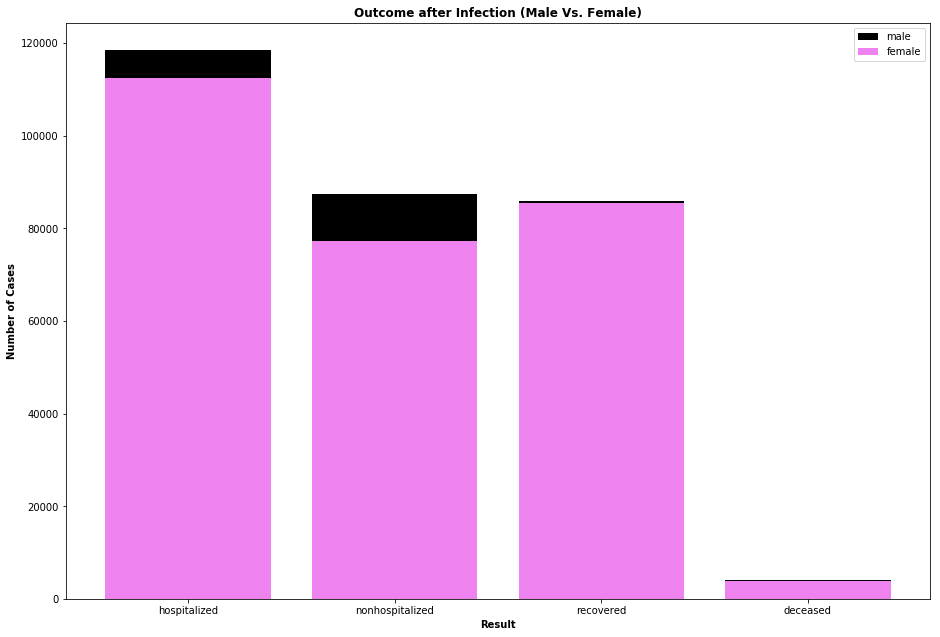

In [83]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(train_data4['outcome'].value_counts().keys(), train_data4['outcome'].dropna().value_counts(),label='male',color='black')
ax.bar(train_data5['outcome'].value_counts().keys(), train_data5['outcome'].dropna().value_counts(),label='female',color='violet')
plt.title('Outcome after Infection (Male Vs. Female)',fontweight='bold')
plt.xlabel('Result',fontweight='bold')
plt.ylabel('Number of Cases',fontweight='bold')
plt.legend(loc='best')
plt.show() 

In [84]:
train_data4['sex'].value_counts()

male    88635
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7f12e25a1780>,
 [Text(-0.17911951335402485, 1.0853184785747534, 'male'),
  Text(0.17911951335402468, -1.0853184785747534, 'female')])

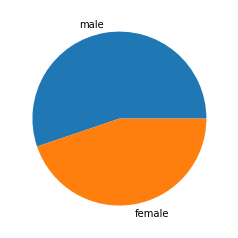

In [85]:
plt.pie(x=train_data['sex'].dropna().value_counts(),labels=['male','female'])

In [86]:
#train_data['age'].dropna().value_counts()
train_data['age'].dropna().value_counts()

35-59      10785
15-34       8314
60-79       7271
80+         4383
31.0        1697
           ...  
50-69          1
37-38          1
5 month        1
17-65          1
74-76          1
Name: age, Length: 337, dtype: int64

In [87]:
train_data6 = pd.DataFrame(train_data, columns=['age', 'outcome'])

In [88]:
train_data6

,age,outcome
0,NaN,recovered
1,NaN,hospitalized
2,NaN,hospitalized
3,15-34,nonhospitalized
4,NaN,hospitalized
...,...,...
367631,15.0,nonhospitalized
367632,NaN,hospitalized
367633,NaN,hospitalized
367634,28,recovered


In [89]:
plt_values7 = train_data6['age'].value_counts()
to_remove7 = plt_values7[plt_values7 <= 4382].index
train_data6 = train_data6[~train_data6.age.isin(to_remove7)]

In [90]:
train_data6['age'].value_counts()

35-59    10785
15-34     8314
60-79     7271
80+       4383
Name: age, dtype: int64

In [91]:
train_data6.dropna()

,age,outcome
3,15-34,nonhospitalized
7,35-59,nonhospitalized
10,15-34,nonhospitalized
58,80+,nonhospitalized
84,15-34,nonhospitalized
...,...,...
367596,35-59,nonhospitalized
367603,15-34,nonhospitalized
367611,35-59,nonhospitalized
367617,35-59,nonhospitalized


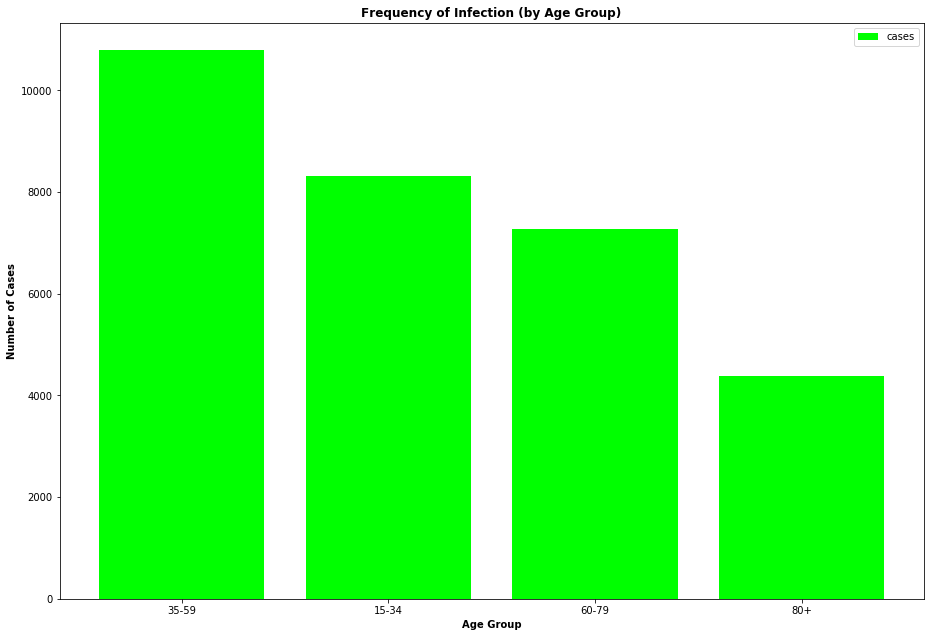

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
#ax.bar(train_data6['outcome'].value_counts().keys(), train_data6['outcome'].dropna().value_counts(),label='outcome',color='purple')
ax.bar(train_data6['age'].value_counts().keys(), train_data6['age'].dropna().value_counts(),label='cases',color='lime')
plt.title('Frequency of Infection (by Age Group)',fontweight='bold')
plt.xlabel('Age Group',fontweight='bold')
plt.ylabel('Number of Cases',fontweight='bold')
plt.legend(loc='best')
plt.show() 

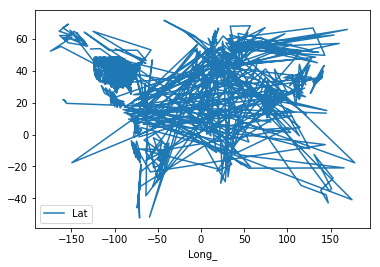

In [93]:
location_data.plot.line(x='Long_', y='Lat')
plt.show()

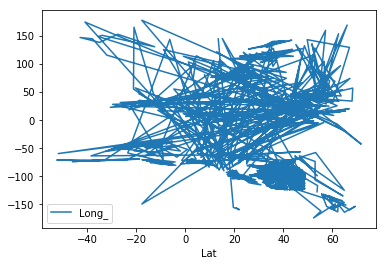

In [94]:
location_data.plot.line(x='Lat', y='Long_')
plt.show()

In [95]:
location_data['Incidence_Rate'].sort_values(ascending=False)

1052    14871.183644
782     14718.980344
991     14604.606982
3277    14595.887983
3239    12414.481186
            ...     
3742             NaN
3796             NaN
3866             NaN
3898             NaN
3943             NaN
Name: Incidence_Rate, Length: 3954, dtype: float64

In [96]:
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


In [97]:
inci_df = pd.DataFrame(location_data, columns=['Combined_Key', 'Incidence_Rate'])

cfr_df = pd.DataFrame(location_data, columns=['Combined_Key', 'Case-Fatality_Ratio'])

In [98]:
inci_df['Incidence_Rate'].sort_values(ascending=False)

1052    14871.183644
782     14718.980344
991     14604.606982
3277    14595.887983
3239    12414.481186
            ...     
3742             NaN
3796             NaN
3866             NaN
3898             NaN
3943             NaN
Name: Incidence_Rate, Length: 3954, dtype: float64

In [99]:
cfr_df['Case-Fatality_Ratio'].sort_values(ascending=False)

3063    108.812950
1821     89.473684
740      50.000000
3076     48.441674
3951     28.874630
           ...    
3554           NaN
3697           NaN
3796           NaN
3866           NaN
3943           NaN
Name: Case-Fatality_Ratio, Length: 3954, dtype: float64

In [100]:
inci_df['Incidence_Rate']

0         99.976005
1        424.838418
2        113.162645
3       2024.202420
4         11.869312
           ...     
3949     686.142828
3950       1.674116
3951       6.792738
3952      76.534126
3953      51.618366
Name: Incidence_Rate, Length: 3954, dtype: float64

In [101]:
plt_values9 = inci_df['Incidence_Rate']
to_remove9 = plt_values9[plt_values9 <= 10000]
inci_df = inci_df[~inci_df.Incidence_Rate.isin(to_remove9)]

In [102]:
inci_df = inci_df.dropna().sort_values(by=['Incidence_Rate'],ascending=False)
inci_df

,Combined_Key,Incidence_Rate
1052,"Chattahoochee, Georgia, US",14871.183644
782,"Lincoln, Arkansas, US",14718.980344
991,"Lafayette, Florida, US",14604.606982
3277,"Trousdale, Tennessee, US",14595.887983
3239,"Lake, Tennessee, US",12414.481186
781,"Lee, Arkansas, US",11787.286892
2341,"Dakota, Nebraska, US",10686.108060


In [103]:
inci_df['Combined_Key']

1052    Chattahoochee, Georgia, US
782          Lincoln, Arkansas, US
991         Lafayette, Florida, US
3277      Trousdale, Tennessee, US
3239           Lake, Tennessee, US
781              Lee, Arkansas, US
2341          Dakota, Nebraska, US
Name: Combined_Key, dtype: object

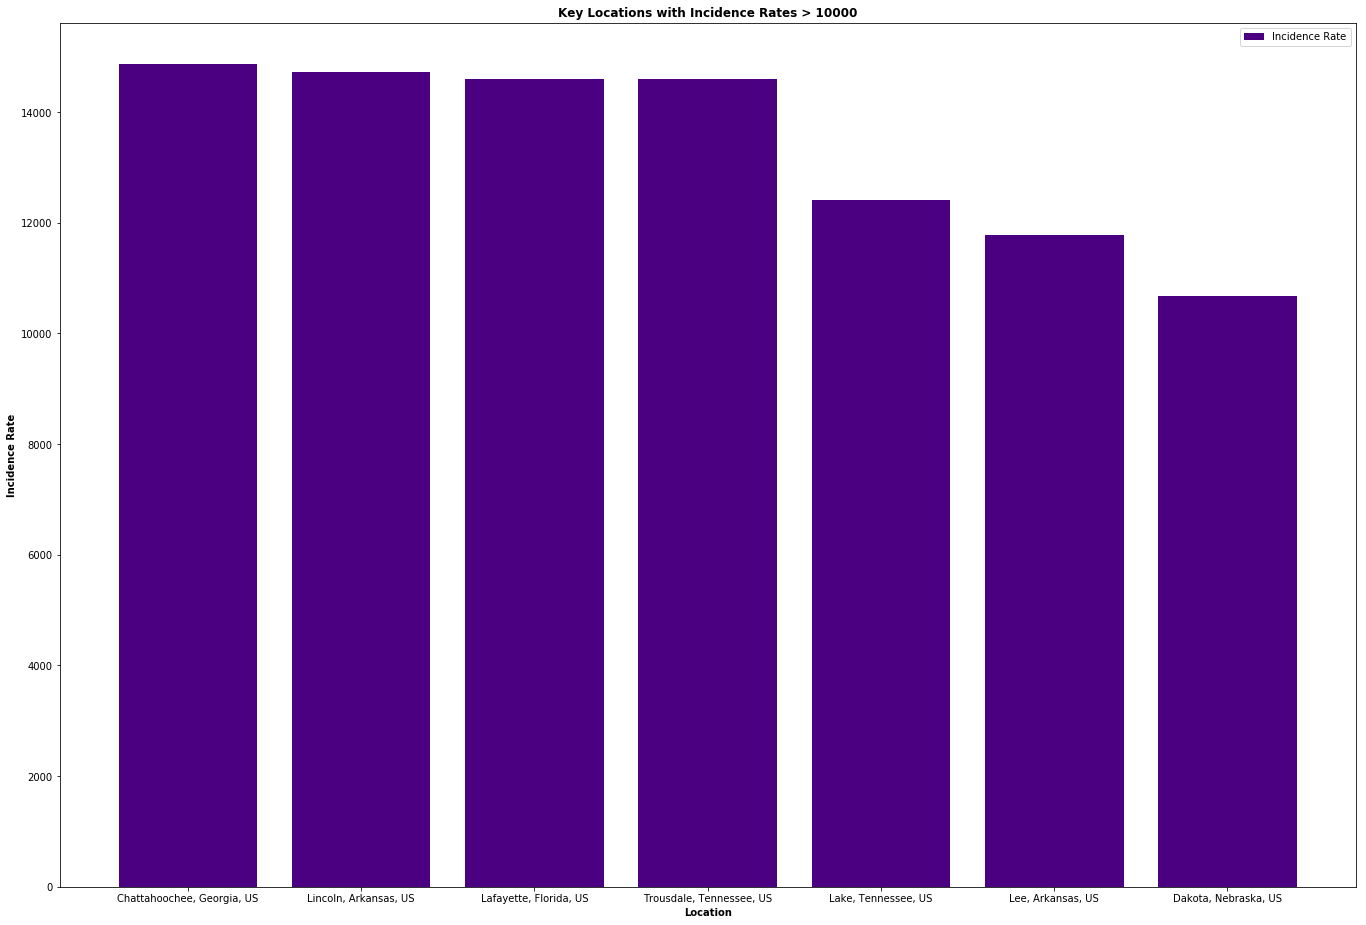

In [104]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
#ax.bar(train_data6['outcome'].value_counts().keys(), train_data6['outcome'].dropna().value_counts(),label='outcome',color='purple')
ax.bar(inci_df['Combined_Key'], inci_df['Incidence_Rate'].dropna(),label='Incidence Rate',color='Indigo')
plt.title('Key Locations with Incidence Rates > 10000',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Incidence Rate',fontweight='bold')
plt.legend(loc='best')
plt.show() 

In [105]:
cfr_df['Case_Fatality_Ratio'] = cfr_df['Case-Fatality_Ratio']
cfr_df

,Combined_Key,Case-Fatality_Ratio,Case_Fatality_Ratio
0,Afghanistan,3.692284,3.692284
1,Albania,2.928186,2.928186
2,Algeria,3.355299,3.355299
3,Andorra,3.388747,3.388747
4,Angola,3.768265,3.768265
...,...,...,...
3949,West Bank and Gaza,0.722795,0.722795
3950,Western Sahara,10.000000,10.000000
3951,Yemen,28.874630,28.874630
3952,Zambia,2.345416,2.345416


In [108]:
plt_values10 = cfr_df['Case_Fatality_Ratio']
to_remove10 = plt_values10[plt_values10 <= 19]
cfr_df = cfr_df[~cfr_df.Case_Fatality_Ratio.isin(to_remove10)]

In [111]:
cfr_df = cfr_df.dropna().sort_values(by=['Case_Fatality_Ratio'],ascending=False)
cfr_df

,Combined_Key,Case-Fatality_Ratio,Case_Fatality_Ratio
3063,"Unassigned, Puerto Rico, US",108.812950,108.812950
1821,"Unassigned, Louisiana, US",89.473684,89.473684
740,"Unassigned, Arizona, US",50.000000,50.000000
3076,"Unassigned, Rhode Island, US",48.441674,48.441674
3951,Yemen,28.874630,28.874630
3512,"Throckmorton, Texas, US",28.571429,28.571429
2053,"Unassigned, Minnesota, US",27.807487,27.807487
2387,"Perkins, Nebraska, US",27.272727,27.272727
362,MS Zaandam,22.222222,22.222222
1846,"Waldo, Maine, US",19.178082,19.178082


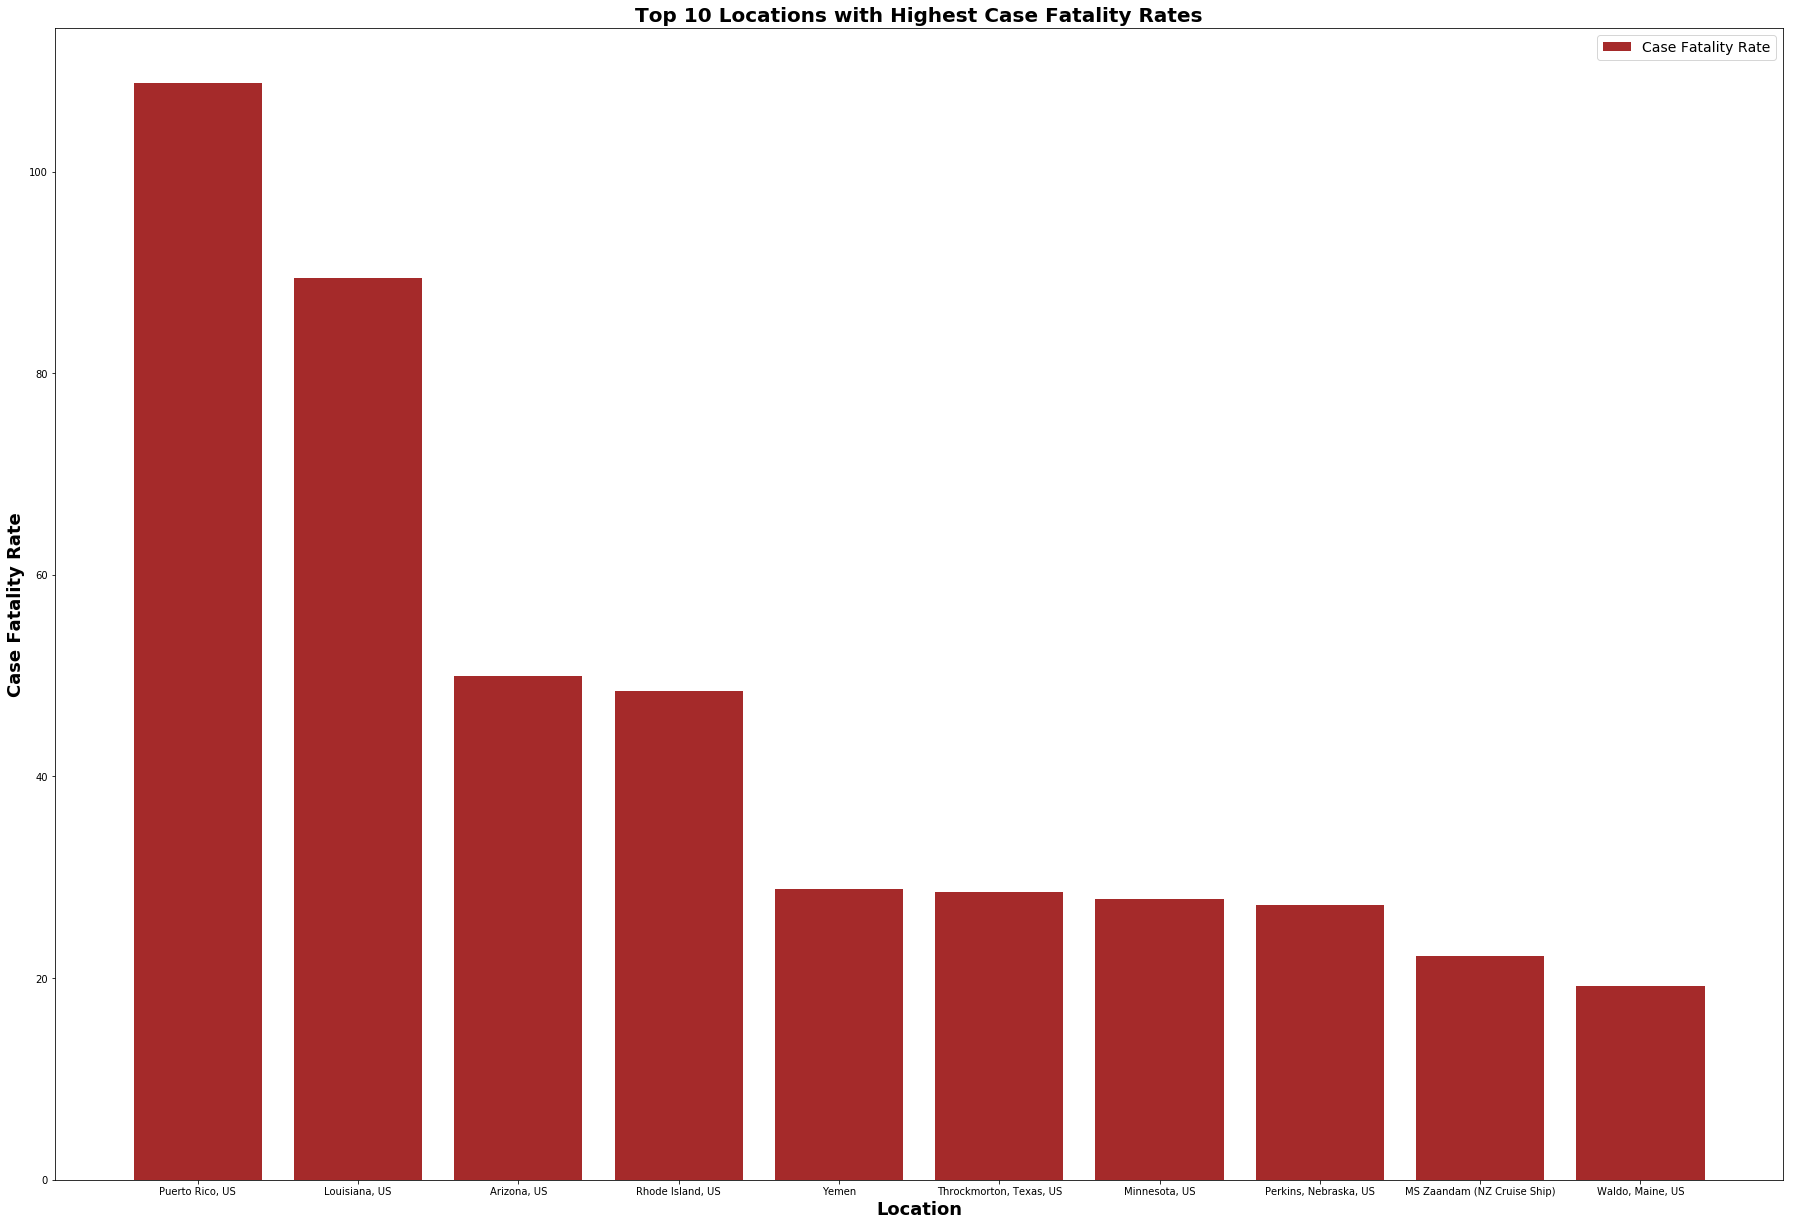

In [130]:
N=10
ind = np.arange(N)
width=0

fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(cfr_df['Combined_Key'], cfr_df['Case_Fatality_Ratio'].dropna(),label='Case Fatality Rate',color='brown')
plt.title('Top 10 Locations with Highest Case Fatality Rates',fontweight='bold', fontsize=20)
plt.xlabel('Location',fontweight='bold', fontsize=18)
plt.ylabel('Case Fatality Rate',fontweight='bold',fontsize=18)

plt.xticks(ind+width/2, ['Puerto Rico, US', 'Louisiana, US', 'Arizona, US', 'Rhode Island, US', 'Yemen', 'Throckmorton, Texas, US', 'Minnesota, US', 'Perkins, Nebraska, US', 'MS Zaandam (NZ Cruise Ship)', 'Waldo, Maine, US'])

plt.legend(loc='best',fontsize=14)
plt.show() 